In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

import os
os.chdir('/kaggle/input/')
os.listdir()

FileNotFoundError: ignored

In [ ]:
# tensorflow libraries/dependencies
import tensorflow as tf
from tensorflow import keras
print(f"Tensorflow Version: {tf.__version__}")
print(f"Number of GPUs Available: {len(tf.config.list_physical_devices('GPU'))}")

Tensorflow Version: 2.12.0
Number of GPUs Available: 1


In [ ]:
pip install visualkeras

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 993.0/993.0 kB 33.8 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


## Generating Data

In [ ]:
# data directories:
train_dir = '/kaggle/input/cats-and-dogs-image-classification/train'
test_dir = '/kaggle/input/cats-and-dogs-image-classification/test'

In [ ]:
# # creating instances of ```ImageDataGenerator``` class
# from tensorflow.keras.preprocessing.image import ImageDataGenerator
# trainDatagen = ImageDataGenerator(rescale = 1./255, rotation_range = 40,
#                                   width_shift_range=0.2, height_shift_range=0.2,
#                                   shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
# test_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
# creating datasets (in form of image generators):
from keras.utils import image_dataset_from_directory
train_generator = image_dataset_from_directory(train_dir, image_size=(64, 64), batch_size=32)
test_generator = image_dataset_from_directory(test_dir, image_size=(64, 64), batch_size=32)

Found 557 files belonging to 2 classes.
Found 140 files belonging to 2 classes.


## Data Visualization

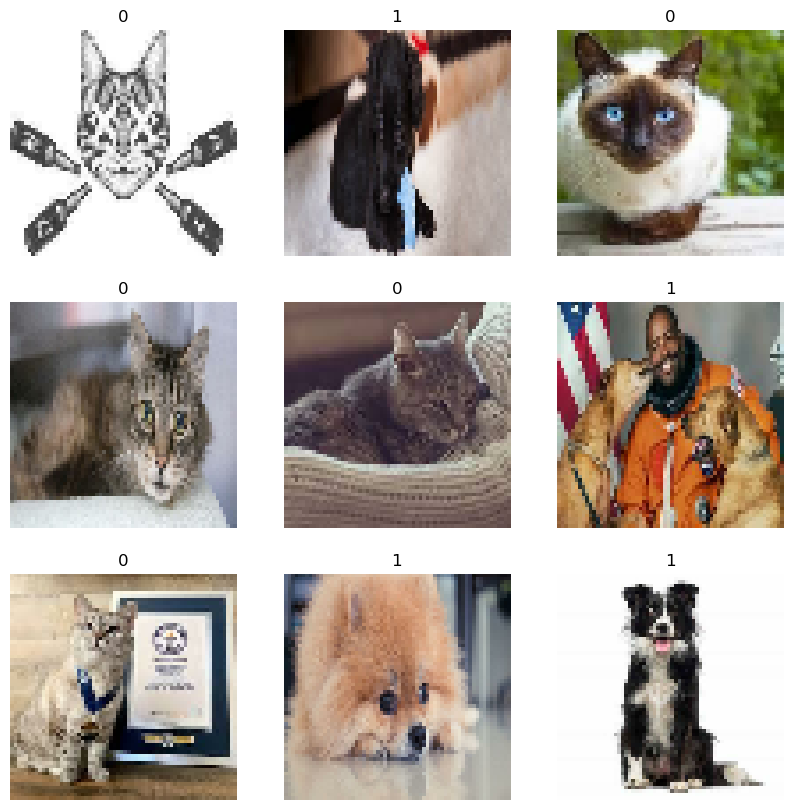

In [ ]:
import matplotlib.pyplot as plt

# showing only the first 10 samples of our training data set
plt.figure(figsize=(10, 10))
for images, labels in test_generator:
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(int(labels[i]))
        plt.axis("off")

## Building Neural Network

In [ ]:
# building CNN
model = keras.Sequential([
    # Conv layer 1:
    keras.layers.Conv2D(128, (3, 3), input_shape=(64,64,3), activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPooling2D(pool_size = (2, 2)),

    # Conv layer 2:
    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPooling2D(pool_size = (2, 2)),

    # Conv layer 3:
    keras.layers.Conv2D(32, (3, 3), activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPooling2D(pool_size = (2, 2)),

    keras.layers.Flatten(),

    # fully connected layers:
    keras.layers.Dense(units = 128, activation = 'relu'),
    keras.layers.Dense(units =1, activation = 'sigmoid')

])

model.compile(optimizer = keras.optimizers.Adam(learning_rate=0.001), loss = 'binary_crossentropy', metrics ='accuracy')

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 128)       3584      
                                                                 
 batch_normalization (BatchN  (None, 62, 62, 128)      512       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 128)      0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 64)        73792     
                                                                 
 batch_normalization_1 (Batc  (None, 29, 29, 64)       256       
 hNormalization)                                                 
                                                        

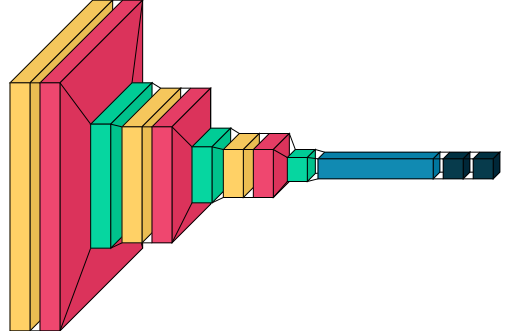

In [ ]:
import visualkeras
visualkeras.layered_view(model)

In [ ]:
es = keras.callbacks.EarlyStopping(monitor='val_loss', patience=7, restore_best_weights=True, verbose=1)
red_lr = keras.callbacks.ReduceLROnPlateau(monitor='val_loss', patience=3, factor=0.1, verbose=1)
logs = model.fit(train_generator, epochs=50, validation_data=test_generator,validation_steps=2000/32, callbacks=[es, red_lr])

Epoch 1/50
18/18 [==============================] - 13s 173ms/step - loss: 0.9580 - accuracy: 0.5673 - val_loss: 4.0439 - val_accuracy: 0.5000 - lr: 0.0010
Epoch 2/50
18/18 [==============================] - 2s 65ms/step - loss: 0.4236 - accuracy: 0.8007 - lr: 0.0010
Epoch 3/50
18/18 [==============================] - 2s 64ms/step - loss: 0.2689 - accuracy: 0.8923 - lr: 0.0010
Epoch 4/50
18/18 [==============================] - 2s 67ms/step - loss: 0.1574 - accuracy: 0.9461 - lr: 0.0010
Epoch 5/50
18/18 [==============================] - 3s 65ms/step - loss: 0.0664 - accuracy: 0.9946 - lr: 0.0010
Epoch 6/50
18/18 [==============================] - 2s 63ms/step - loss: 0.0320 - accuracy: 0.9982 - lr: 0.0010
Epoch 7/50
18/18 [==============================] - 2s 64ms/step - loss: 0.0175 - accuracy: 1.0000 - lr: 0.0010
Epoch 8/50
18/18 [==============================] - 2s 66ms/step - loss: 0.0092 - accuracy: 1.0000 - lr: 0.0010
Epoch 9/50
18/18 [==============================] - 2s 65ms/

## Plotting Training curve:

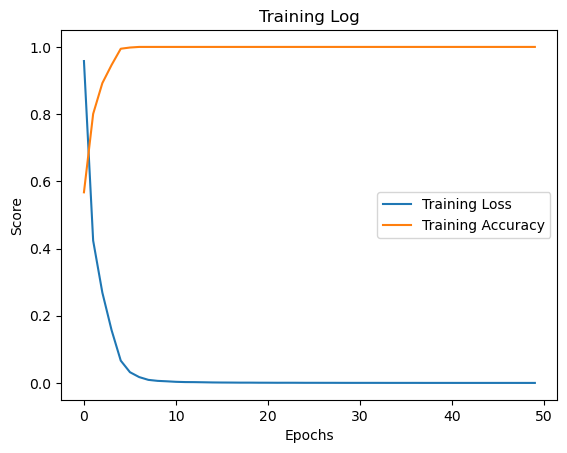

In [ ]:
import matplotlib.pyplot as plt
plt.title('Training Log')
plt.plot(logs.history['loss'], label='Training Loss')
plt.plot(logs.history['accuracy'], label='Training Accuracy')
# plt.plot(logs.history['val_loss'], label='Validation Loss', linewidth=3)
# plt.plot(logs.history['val_accuracy'], label='Validation accuracy', linewidth=3)
plt.xlabel('Epochs')
plt.ylabel('Score')
plt.legend()
plt.show()

## Model Evaluation

In [ ]:
res = model.evaluate(test_generator)

5/5 [==============================] - 0s 5ms/step - loss: 1.2493 - accuracy: 0.7143


In [ ]:
accuracy = res[1]
print(accuracy)

0.7142857313156128


Validation accuracy obtained: **67.14%** *(with 3 conv layers and one fully connected layer)*

### Tesing a random image:

In [ ]:
img = keras.preprocessing.image.load_img(
    "/kaggle/input/cats-and-dogs-image-classification/train/cats/cat_104.jpg",
    target_size=(64,64)
)
img_array = keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)  # Create batch axis

predictions = model.predict(img_array)
score = float(predictions[0])
print(f"This image is {100 * (1 - score):.2f}% cat and {100 * score:.2f}% dog.")

1/1 [==============================] - 0s 191ms/step
This image is 100.00% cat and 0.00% dog.
